In [1]:
import pyxdf
import matplotlib.pyplot as plt
import numpy as np
import mne

In [2]:
# read xdf file 
data, header = pyxdf.load_xdf('Data/2triggerss.xdf')

In [4]:
data[1]

{'info': defaultdict(list,
             {'name': ['Tobii_TTL'],
              'type': ['ET'],
              'channel_count': ['3'],
              'channel_format': ['float32'],
              'source_id': ['tet-tcp://169.254.10.243'],
              'nominal_srate': ['0.000000000000000'],
              'version': ['1.100000000000000'],
              'created_at': ['410.3974673000000'],
              'uid': ['337cc45f-81a9-470c-a5cc-02356ad0bfc5'],
              'session_id': ['default'],
              'hostname': ['SHAHAR-LAB-PC12'],
              'v4address': [None],
              'v4data_port': ['16573'],
              'v4service_port': ['16574'],
              'v6address': [None],
              'v6data_port': ['16573'],
              'v6service_port': ['16574'],
              'desc': [defaultdict(list,
                           {'manufacturer': ['Tobii'],
                            'channels': [defaultdict(list,
                                         {'channel': [defaultdict(list,

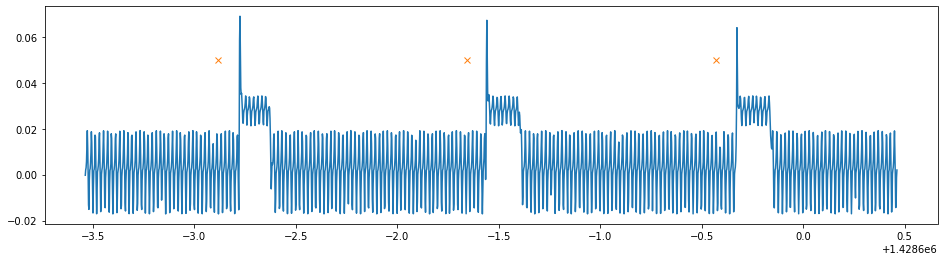

In [101]:
# xdf file - plot the first 3 samples 
plt.figure(figsize=(16,4))
plt.plot(data[2]['time_stamps'][3000:5000],data[2]['time_series'][:,0][3000:5000])
plt.plot(data[1]['time_stamps'][0:3],data[1]['time_series'][0:3]-0.95,'x')

In [46]:
# read xdf file - multiple EEG
data_m, header_m = pyxdf.load_xdf('Data/diod_multipleEEG.xdf')

In [71]:
np.array(data_m).shape
data_m[0]['time_stamps'][:,64]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

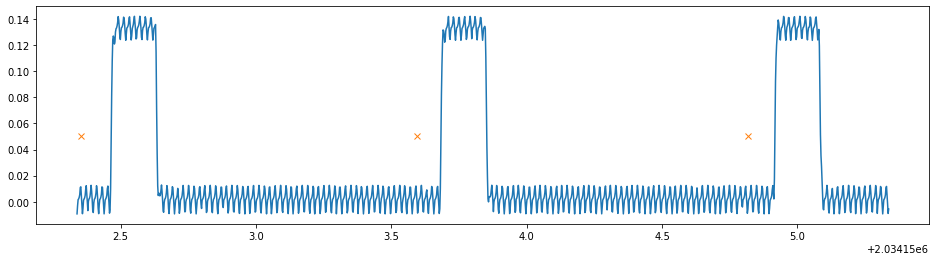

In [83]:
# xdf file multiple EEG - plot the first 3 samples 
plt.figure(figsize=(16,4))
plt.plot(data_m[0]['time_stamps'][6000:7500],data_m[0]['time_series'][:,64][6000:7500])
plt.plot(data_m[1]['time_stamps'][0:3],data_m[1]['time_series'][0:3]-0.95,'x')

In [58]:
dataEDF

<RawEDF | exp2.edf, 1 x 41315 (82.6 s), ~7 kB, data not loaded>

In [93]:
# read edf file
dataEDF = mne.io.read_raw_edf('Data/exp2.edf')
raw_data = dataEDF.get_data()
events = mne.events_from_annotations(dataEDF)
info = dataEDF.info
channels = dataEDF.ch_names
dataEDF

Extracting EDF parameters from C:\Users\User\Desktop\shaked_maya\Data\exp2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: [' 1']


<RawEDF | exp2.edf, 1 x 41315 (82.6 s), ~7 kB, data not loaded>

In [69]:
raw_data.shape

(1, 41315)

In [68]:
x.s

(50,)

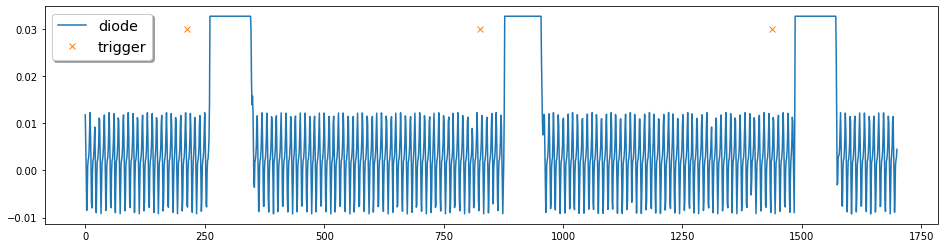

In [105]:
# plot edf data - diod and trigers via EEGO
x = np.array(events[0])[:,0]
y = len(x)
plt.figure(figsize=(16,4))
plt.plot(raw_data[0][9800:11500], label='diode')
plt.plot(x[4:7] -9800 , [0.03]*3, 'x', label='trigger')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')

In [96]:
print(raw_data[0][10000:11500])
x

[ 0.01169432  0.00571141 -0.00086149 ...  0.00218547  0.00282646
  0.00450343]


array([ 7563,  8173,  8787,  9400, 10013, 10626, 11238, 11852, 12466,
       13079, 13691, 14305, 14917, 15529, 16142, 16753, 17365, 17979,
       18591, 19205, 19817, 20431, 21043, 21655, 22265, 22877, 23489,
       24102, 24716, 25330, 25940, 26551, 27163, 27773, 28383, 28994,
       29603, 30214, 30823, 31434, 32045, 32656, 33267, 33879, 34491,
       35101, 35709, 36322, 36933, 37545])

In [70]:
events

(array([[ 7563,     0,     1],
        [ 8173,     0,     1],
        [ 8787,     0,     1],
        [ 9400,     0,     1],
        [10013,     0,     1],
        [10626,     0,     1],
        [11238,     0,     1],
        [11852,     0,     1],
        [12466,     0,     1],
        [13079,     0,     1],
        [13691,     0,     1],
        [14305,     0,     1],
        [14917,     0,     1],
        [15529,     0,     1],
        [16142,     0,     1],
        [16753,     0,     1],
        [17365,     0,     1],
        [17979,     0,     1],
        [18591,     0,     1],
        [19205,     0,     1],
        [19817,     0,     1],
        [20431,     0,     1],
        [21043,     0,     1],
        [21655,     0,     1],
        [22265,     0,     1],
        [22877,     0,     1],
        [23489,     0,     1],
        [24102,     0,     1],
        [24716,     0,     1],
        [25330,     0,     1],
        [25940,     0,     1],
        [26551,     0,     1],
        

In [107]:
# read edf file- multiple EEG
dataEDF_m = mne.io.read_raw_edf('Data/diod_multipleEEG_Segment_1.edf')
raw_data = dataEDF_m.get_data()
events = mne.events_from_annotations(dataEDF_m)
info = dataEDF_m.info
channels = dataEDF_m.ch_names

Extracting EDF parameters from C:\Users\User\Desktop\shaked_maya\Data\diod_multipleEEG_Segment_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: [' 1']


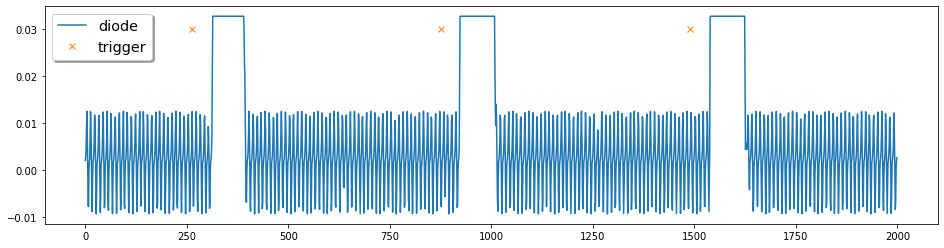

In [108]:
# plot edf data with multiple EEG- diod and trigers via EEGO
x = np.array(events[0])[:,0]
y = len(x)
plt.figure(figsize=(16,4))
plt.plot(raw_data[64][10000:12000], label='diode')
plt.plot(x[3:6] - 10000, [0.03]*3, 'x', label='trigger')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')

In [23]:
raw_data[1]


array([-0.032767, -0.032767, -0.032767, ..., -0.032767, -0.032767,
       -0.032767])

In [ ]:
# threshold of the diod signal to find when active lsl
activation_diod_ts = []
flag = 1
threshold = 0.04  

for i,j in zip(raw_data[64],data_m[0]['time_stamps']):
    
    if flag:
        if i > threshold:
            activation_diod_ts.append(j)
            flag = 0
    if i < threshold:
        flag = 1
len(activation_diod_ts)

In [88]:
# threshold of the diod signal to find when active eego
activation_diod_ts = []
flag = 1
threshold = 0.02  

for i in range(len(raw_data[64])):
    
    if flag:
        if raw_data[64][i] > threshold:
            activation_diod_ts.append(i)
            flag = 0
    if raw_data[64][i] < threshold:
        flag = 1
len(activation_diod_ts)

50

In [89]:
# diffrence from diod actavation and trigger 
diss = np.array(activation_diod_ts) - np.array(events[0])[:,0]
diss=diss/1000.0
diss

array([0.055, 0.045, 0.049, 0.05 , 0.047, 0.049, 0.052, 0.047, 0.051,
       0.044, 0.046, 0.049, 0.047, 0.05 , 0.045, 0.049, 0.045, 0.047,
       0.05 , 0.047, 0.048, 0.043, 0.049, 0.044, 0.048, 0.045, 0.048,
       0.051, 0.046, 0.05 , 0.046, 0.05 , 0.046, 0.048, 0.051, 0.046,
       0.051, 0.045, 0.048, 0.043, 0.05 , 0.052, 0.047, 0.048, 0.052,
       0.046, 0.049, 0.045, 0.049, 0.051])

In [111]:
# diffrence from diod actavation and trigger 
diss = np.array(activation_diod_ts) - data_m[1]['time_stamps']

Mean 0.04798
Std 0.002603766502588126
Min 0.043
Max 0.055


Text(0, 0.5, 'Count')

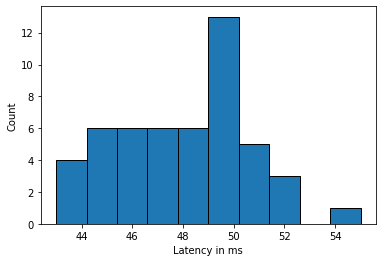

In [90]:
# plot stats 
print('Mean',(diss).mean())
print('Std',(diss).std())
print('Min',(diss).min())
print('Max',(diss).max())
plt.hist(diss*1000,bins=10,edgecolor='k')

plt.xlabel('Latency in ms')
plt.ylabel('Count')

In [46]:

print(len(raw_data[64]))
np.array(events[0])[:,0]

46166


array([ 8417,  9036,  9649, 10263, 10876, 11490, 12104, 12717, 13330,
       13945, 14559, 15173, 15784, 16397, 17010, 17624, 18236, 18850,
       19463, 20075, 20691, 21304, 21915, 22528, 23141, 23753, 24366,
       24980, 25592, 26206, 26818, 27431, 28044, 28658, 29271, 29884,
       30497, 31111, 31724, 32337, 32948, 33562, 34175, 34791, 35404,
       36018, 36631, 37244, 37857, 38471])